# 이미지 식별 머신을 위한 데이터를 준비한다.

## 필요한 라이브러리를 불러 온다.

In [1]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 데이터 플로팅 라이브러리
import matplotlib.pyplot as plt
# 숫자 처리 라이브러리
import numpy as np
# 딥러닝을 위한 파이토치 라이브러리
import torch
from torch import nn, optim

# 토치비전 라이브러리
import torchvision
from torchvision import datasets, transforms, models 

# 이미지 처리 라이브러리 (PIL, pillow)
from PIL import Image

# 주피터 노트북에서 plot이 보이도록 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 디렉토리, 분할 비율, 변환 방법을 설정한다.

In [3]:
# 이미지 데이터가 있는 디렉토리와 데이터 세트 분할 비율(valid_size)을 정한다.
data_dir ='./data'
valid_size=0.2

# 이미지 데이터를 ResNet50에서 다룰 수 있도록 변환시키는 방법을 정한다. (t_transforms)
t_transforms = transforms.Compose([transforms.RandomResizedCrop(224), transforms.Resize(224), 
                                   transforms.ToTensor()])


### (확인) 변환 방법을 출력하여 확인해 본다.

In [4]:
# 설정한 이미지 데이터 변환 방법을 출력하여 확인한다.
print(t_transforms)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


## 데이터를 로딩 함수를 작성한다.

### (연습) trainloader와 testloader를 만들어 본다.

#### 1. 학습 데이터 세트 및 테스트 데이터 세트의 디렉토리 및 변환 방식을 지정한다.

In [5]:
# datasets.ImageFolder를 사용해서 학습 데이터(train_data)와 테스트 데이터(test_data)를 만든다.
train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
test_data = datasets.ImageFolder(data_dir, transform=t_transforms)


# 학습 데이터의 형식을 확인한다.

print(train_data)


# 학습 데이터와 테스트 데이터의 길이를 확인한다.

print(len(train_data), len(test_data))





Dataset ImageFolder
    Number of datapoints: 155
    Root location: ./data
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
155 155


#### 2. 데이터세트를 섞기 위해, 우선 인덱스를 만들어 랜덤하게 섞는다.

In [6]:
# train_data 사이즈만큼의 정수값을 갖는 인덱스 리스트(indices)를 만들고 확인한다.
num_train = len(train_data)
indices = list(range(num_train))
print(indices)


# 인덱스 리스트를 랜덤하게 섞고 확인한다.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]


In [7]:
# 인덱스 리스트를 랜덤하게 섞고 확인한다.
np.random.shuffle(indices)
print(indices)

[99, 46, 108, 39, 29, 115, 24, 85, 55, 136, 149, 109, 146, 92, 53, 63, 17, 12, 76, 89, 40, 16, 8, 5, 33, 93, 104, 25, 70, 120, 137, 66, 4, 51, 48, 43, 69, 127, 37, 3, 139, 62, 145, 42, 31, 80, 144, 138, 88, 56, 133, 132, 114, 75, 77, 106, 54, 81, 6, 141, 142, 102, 11, 82, 121, 28, 107, 148, 20, 84, 151, 79, 86, 15, 90, 122, 125, 103, 78, 7, 32, 22, 96, 9, 95, 113, 111, 52, 57, 34, 13, 116, 68, 73, 124, 117, 123, 65, 59, 154, 94, 47, 83, 41, 112, 35, 153, 72, 150, 91, 64, 135, 30, 87, 134, 105, 126, 131, 143, 98, 67, 0, 23, 49, 140, 119, 38, 19, 152, 147, 129, 1, 101, 45, 60, 2, 100, 27, 10, 74, 128, 118, 44, 26, 61, 58, 71, 97, 14, 18, 130, 110, 21, 36, 50]


#### 3. 분할 비율(valid_size)에 따른 지점의 인덱스 값(split)을 계산한다.

In [8]:
# 분할 비율(valid_size)에 해당하는 인덱스를 계산하고 확인해 본다.

split = int(np.floor(num_train * valid_size))
print(split)


31


#### 4. split을 기준으로 학습 데이터 인덱스 리스트와 테스트 인덱스 리스트로 나눈다.

In [9]:
# 학습 데이터 인덱스 리스트 및 테스트 인덱스 리스트를 만들고 확인해 본다.

train_idx, test_idx = indices[split:], indices[:split]
print(train_idx)
print(test_idx)



[66, 4, 51, 48, 43, 69, 127, 37, 3, 139, 62, 145, 42, 31, 80, 144, 138, 88, 56, 133, 132, 114, 75, 77, 106, 54, 81, 6, 141, 142, 102, 11, 82, 121, 28, 107, 148, 20, 84, 151, 79, 86, 15, 90, 122, 125, 103, 78, 7, 32, 22, 96, 9, 95, 113, 111, 52, 57, 34, 13, 116, 68, 73, 124, 117, 123, 65, 59, 154, 94, 47, 83, 41, 112, 35, 153, 72, 150, 91, 64, 135, 30, 87, 134, 105, 126, 131, 143, 98, 67, 0, 23, 49, 140, 119, 38, 19, 152, 147, 129, 1, 101, 45, 60, 2, 100, 27, 10, 74, 128, 118, 44, 26, 61, 58, 71, 97, 14, 18, 130, 110, 21, 36, 50]
[99, 46, 108, 39, 29, 115, 24, 85, 55, 136, 149, 109, 146, 92, 53, 63, 17, 12, 76, 89, 40, 16, 8, 5, 33, 93, 104, 25, 70, 120, 137]


#### 5. 데이터 로딩 - 데이터 세트들의 샘플러 및 로더를 만들고 확인한다.

In [10]:
# 데이터 샘플링 방식(SubsetRandomSampler)을 지정한다

from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)



# 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)

trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
#왜 배치사이즈 16??
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)



# 학습 loader와 테스트 loader의 class들을 출력하여 확인한다.
print(trainloader.dataset.classes)
print(testloader.dataset.classes)



['Basalt', 'Highland']
['Basalt', 'Highland']


### 코드들을 묶어서 load_split_train_test() 함수를 만든다.

In [11]:
# 위의 코드들을 묶어서 load_split_train_test() 함수를 만든다. (입력 : 데이터 디렉토리, 분할 비율) (출력 : 학습 데이터 로더, 테스트 데이터 로더)

# 데이터 분할 및 샘플러를 포함하는 데이터 로딩하는 함수임

def load_split_train_test(data_dir, valid_size):
   
    t_transforms = transforms.Compose([transforms.RandomResizedCrop(224), transforms.Resize(224), 
                                   transforms.ToTensor()])
    
    train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))  # train_data 사이즈만큼의 정수값을 갖는 인덱스 리스트(indices)를 만들고 확인한다.

    np.random.shuffle(indices) # 인덱스 리스트를 랜덤하게 섞고
    split = int(np.floor(num_train * valid_size))
    train_idx, test_idx = indices[split:], indices[:split]
    from torch.utils.data.sampler import SubsetRandomSampler

    train_sampler = SubsetRandomSampler(train_idx)
    test_sample = SubsetRandomSampler(test_idx)

    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

    return trainloader, testloader





### load_split_train_test() 함수를 이용하여 trainloader, testloader를 생성한다.

In [12]:
# load_split_train_test() 함수를 이용하여 trainloader와 testloader를 만들고 확인한다.

trainloader, testloader = load_split_train_test(data_dir, 0.2)

print(trainloader.dataset.classes)
print(testloader.dataset.classes)


['Basalt', 'Highland']
['Basalt', 'Highland']


## 이미지 데이터 샘플들을 살펴본다.

### 임의의 데이터를 로딩한 후 이미지와 레이블을 반환하는 get_random_images() 함수를 만든다.

In [13]:
def get_random_images(num) : 
    data = datasets.ImageFolder(data_dir, transform=t_transforms)
    indices = list(range(len(data))) #data 사이즈만큼의 정수값을 갖는 인덱스 리스트(indices)를 만들고 확인
    np.random.shuffle(indices) # 인덱스 리스트를 랜덤하게 섞고
    idx = indices[:num]  #지정한 개수만큼 별도의 인텍스 리스트 생성 num 으로 지정해서 자름
 
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)
    #가져올 이미지개수 = num = 가져올 이미지갯수만큼 뱃치사이즈를 설정~ 왜냐
    #loadder에서 데이터를 배치 한개한개씩 꺼내주는 iterator 반복을 생성할거라서?

    dataiter = iter(loader)
    images, labels = next(dataiter)

    return images, labels


### 임의 선택한 이미지를 표시해 본다.

<function matplotlib.pyplot.show(close=None, block=None)>

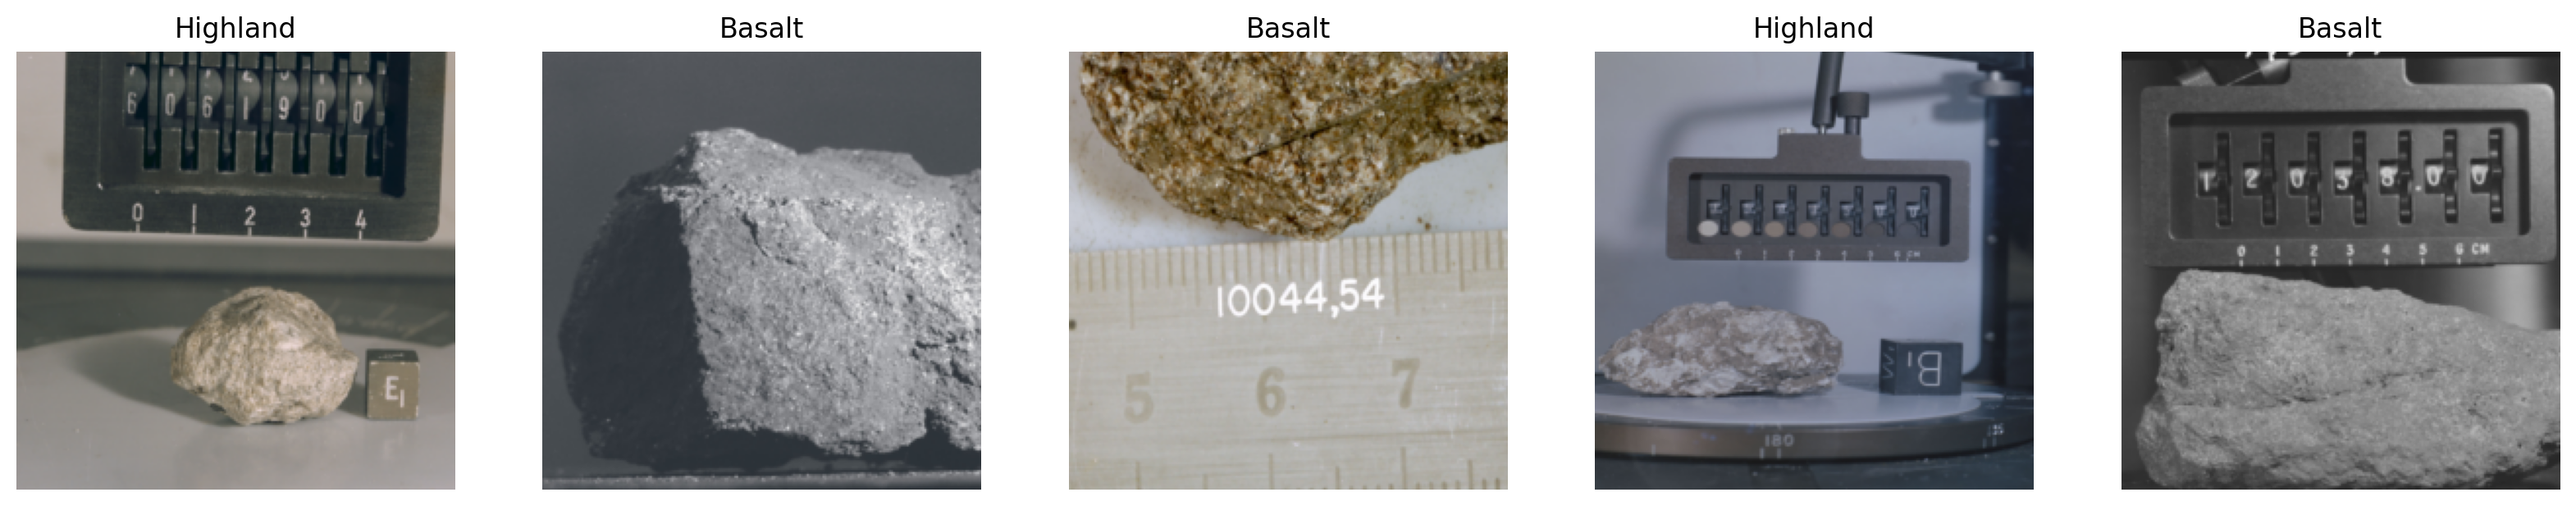

In [14]:
# 5개의 이미지와 레이블을 랜덤하게 가져온다.

images, labels = get_random_images(5)


# 픽셀 배열을 PIL 형식의 이미지로 변환하고 이미지 크기를 지정한다.
#파이썬 이미지 형식 PIL으로 변환하고 변환방식, 형식 지정

to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20,20))

# 학습 데이터의 class 리스트를 얻는다.
classes = trainloader.dataset.classes

# 이미지를 표시하기 위한 설정을 한다.

for k in range(len(images)):
    image = to_pil(images[k])
    sub = fig.add_subplot(1, len(images),k+1)
    index = labels[k].item()
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)

plt.show


# 주피터 노트북에 이미지를 표시한다.


# ResNet50 모델을 가져와 FCL(Fully Connected Layer)을 수정한다.

## Compute device를 정한다(CPU or GPU)

![alt text](image-4.png)

In [15]:
# compute device를 정하고 확인한다. (CPU 할건지 GPU 할건지)
#지금은 GPU 가용하지 않으면 CPU  사용하는 것으로

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## 사전학습된 ResNet50 모델을 지정한다.

In [16]:
# resnet50 모델을 pretrained=True로 설정한다.

model = models.resnet50(pretrained = True)


c:\Users\EL90\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\EL90\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### (확인) 수정 전의 ResNet50 모델을 확인해 본다. 

In [17]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## FCL을 수정한다.(뉴런 구축, 신경망 연결, FCL의 layer 설정 등)

In [18]:
# 모든 신경망 구축 : 전이학습을 위해 모델의 가중치를 freeze 한다.
for param in model.parameters():   #파라미터 업그레이드~
    param.requires_grad = False 
    
# 뉴런들을 연결하여 신경망을 생성한다.

model.fc = nn.Sequential(nn.Linear(2048,512),
                         nn.ReLU(),
                         nn.Dropout(0,2),
                         nn.Linear(512,2),
                         nn.LogSoftmax(dim=1))

#FCL수정 왜? 무슨 의미가 있지 ㅎㅎㅎ
# q: explain the above code
# a: 2048개의 입력을 받아 512개의 출력을 내고, ReLU 함수를 거쳐 0.2의 확률로 Dropout을 적용한다.
# 512개의 입력을 받아 2개의 출력을 내고, LogSoftmax 함수를 거쳐 1차원으로 변환한다.
# 1차원으로 변환된 출력을 갖는 신경망을 생성한다.

# 손실함수를 Cross entropy loss 함수로 지정한다.
criterian = nn.NLLLoss()

# why ?
# optimizer를 Adam으로 지정한다.
optimizer = optim.Adam(model.fc.parameters(), lr =0.003)
# what is Adam


# 신경망을 compute device로 보낸다.
model.to(device)

# 종료 여부를 출력한다.
print('done!')


done!


### (확인) FCL을 확인해 본다.

In [19]:
print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0, inplace=2)
  (3): Linear(in_features=512, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)


# 모델의 FCL을 학습시키고 테스트 한다.

## 모델 학습/검증을 위한 변수를 설정한다.

In [20]:
# 에폭 및 출력 간격을 설정한다.
epochs = 10
print_everyday = 5

# 손실 변수들을 초기화 한다.

running_loss = 0
train_losses, test_losses = [],[]


# 현재의 학습 단계를 표현하는 steps 변수를 0으로 초기화 한다.

steps=0


## 설정한 에폭만큼 모델을 학습시키며 검증/평가 한다.

In [21]:
# 설정한 회수만큼 학습 후 테스트 및 평가해 본다.
for epoch in range(epochs):
    epoch +=1
    for inputs, labels in trainloader:
        steps +=1
        print('Training Step', steps)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterian(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if steps % print_everyday ==0:
            test_loss = 0
            accuracy = 0

            model.eval()
            with torch.no_grad():
                for inputs, labels, in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterian(logps,labels)
                    test_loss +=batch_loss.item()
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))

            print("Epoch{}/{}: ".format(epoch, epochs),
                  "Train Loss : {:.3f}..".format(running_loss/print_everyday),
                  "Test Loss : {:.3f}..".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.3f}\n".format(accuracy/len(testloader)))
            running_loss = 0
            model.train()
            break



        


Training Step 1
Training Step 2
Training Step 3
Training Step 4
Training Step 5
Epoch1/10:  Train Loss : 2.267.. Test Loss : 0.815.. Test Accuracy: 0.706

Training Step 6
Training Step 7
Training Step 8
Training Step 9
Training Step 10
Epoch2/10:  Train Loss : 1.016.. Test Loss : 0.750.. Test Accuracy: 0.706

Training Step 11
Training Step 12
Training Step 13
Training Step 14
Training Step 15
Epoch3/10:  Train Loss : 1.385.. Test Loss : 1.589.. Test Accuracy: 0.421

Training Step 16
Training Step 17
Training Step 18
Training Step 19
Training Step 20
Epoch4/10:  Train Loss : 1.055.. Test Loss : 0.402.. Test Accuracy: 0.838

Training Step 21
Training Step 22
Training Step 23
Training Step 24
Training Step 25
Epoch5/10:  Train Loss : 0.455.. Test Loss : 0.208.. Test Accuracy: 0.938

Training Step 26
Training Step 27
Training Step 28
Training Step 29
Training Step 30
Epoch6/10:  Train Loss : 0.337.. Test Loss : 0.437.. Test Accuracy: 0.710

Training Step 31
Training Step 32
Training Step 3

### (확인) 학습 손실값과 테스트 손실값을 그래프로 확인한다.

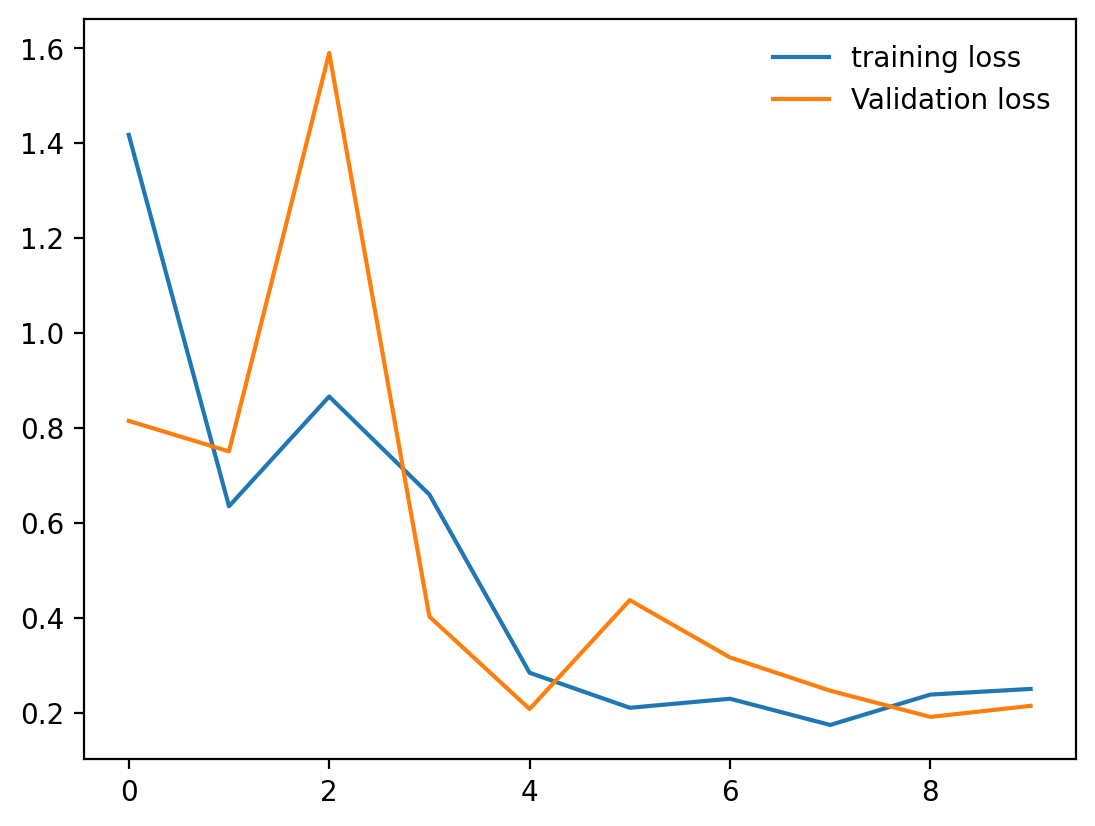

In [22]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label = 'Validation loss')
plt.legend(frameon = False)



# in this graph, what is x-axis? y-axis?
# x-axis: epoch
# y-axis: loss

# 학습/테스트 완료된 모델을 저장한다.

In [26]:
# 추후 로드하여 사용할 수 있도록 학습/테스트 완료된 모델을 저장한다.
torch.save(model, 'moonrockmodel.pth')


# 완성된 모델을 사용하여 예측한다.

## 저장한 모델을 불러온다.

In [27]:
# 저장한 모델을 불러온다.
device = torch.device('cuba' if torch.cuda.is_available() else 'cpu')
model = torch.load('moonrockmodel.pth', weights_only=False)



### (확인) 불러온 모델을 확인해 본다.

In [28]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 이미지 예측을 위해 predict_image() 함수를 만든다.

![alt text](image-5.png)

In [29]:
def predict_image(image):
    image_tensor = t_transforms(image).float()
    input = image_tensor.unsqueeze_(0)
    input = input.to(device)
    output = model(input)
    index = output.data.numpy().argmax()

    return index


## 5개의 이미지를 임의로 가져와 예측해 본다.

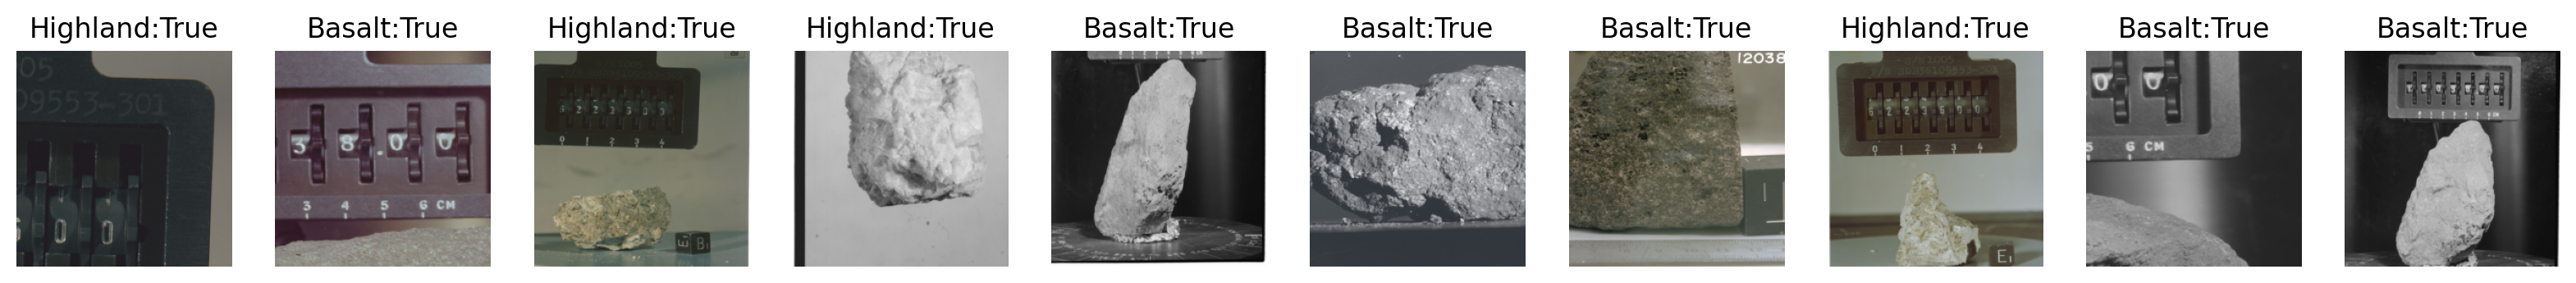

In [33]:
model.eval()

to_pil = transforms.ToPILImage()
images, labels = get_random_images(10)
fig = plt.figure(figsize=(20,20))

classes = trainloader.dataset.classes
for k in range(len(images)):

    image = to_pil(images[k])
    index = predict_image(image)

    sub = fig.add_subplot(1, len(images), k+1)
    res = labels[k].item() == index
    sub.set_title(classes[index] + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)

plt.show()




In [35]:
import random

def get_balanced_images(dataset, class_names, num_per_class):
    # 1. 클래스 이름에 해당하는 인덱스(레이블 숫자) 찾기
    class_indices = {name: dataset.classes.index(name) for name in class_names}
    
    # 2. 각 클래스에 해당하는 데이터셋 내 샘플 인덱스 수집
    # targets는 데이터셋의 모든 이미지 레이블(정수) 리스트라고 가정합니다.
    all_indices = {name: [] for name in class_names}
    
    # 데이터셋의 targets가 numpy 배열이 아닐 수 있으므로 리스트로 변환하여 처리
    targets_list = dataset.targets 
    
    for i, target in enumerate(targets_list):
        for name, class_idx in class_indices.items():
            if target == class_idx:
                all_indices[name].append(i)
                
    # 3. 각 클래스에서 지정된 개수만큼 무작위 선택
    selected_indices = []
    for name in class_names:
        # 해당 클래스 이미지 수가 요청 개수보다 적을 경우 예외 처리
        if len(all_indices[name]) < num_per_class:
            print(f"Warning: Only found {len(all_indices[name])} images for {name}.")
            selected_indices.extend(all_indices[name])
        else:
            selected_indices.extend(random.sample(all_indices[name], num_per_class))

    # 4. 선택된 인덱스로부터 데이터셋 이미지와 레이블 추출
    images = [dataset[i][0] for i in selected_indices]  # 이미지 데이터 (텐서)
    labels = [dataset[i][1] for i in selected_indices]  # 레이블 (텐서 또는 정수)
    
    # 이미지를 텐서로 변환 (기존 코드의 images 리스트 형태 유지)
    return images, labels

# --- 사용 방법 ---
# 10개 중 5개:5개로 가져오기 위한 설정
TARGET_CLASSES = ['Basalt', 'Highland']
NUM_SAMPLES_PER_CLASS = 5

# 새로운 함수 호출 (여기서는 trainloader.dataset을 바로 사용합니다.)
images, labels = get_balanced_images(
    trainloader.dataset, 
    TARGET_CLASSES, 
    NUM_SAMPLES_PER_CLASS
)

In [38]:
model.eval()

to_pil = transforms.ToPILImage()
images, labels = get_balanced_images(data_dir,class_names=['Highland','Basalt'], num_per_class=5)
fig = plt.figure(figsize=(20,20))

classes = trainloader.dataset.classes
for k in range(len(images)):

    image = to_pil(images[k])
    index = predict_image(image)

    sub = fig.add_subplot(1, len(images), k+1)
    res = labels[k].item() == index
    sub.set_title(classes[index] + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)

plt.show()

AttributeError: 'str' object has no attribute 'classes'